# Assignment 1
Michael Wendell

Amazon 2014 Dataset - Video Games

This notebook's purpose is to analyze Amazon Video Game reviews spanning May 1996 - July 2014

## Data Import

In [1]:
import gzip
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#function to read the .json.gz file formats.
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield eval(l)

In [3]:
ratings = []
reviewerID = []
itemID = []
for review in parse("reviews_Video_Games.json.gz"):
   ratings.append(review['overall'])
   reviewerID.append(str(review['reviewerID']))
   itemID.append(str(review['asin']))

The code below is to read the title of the items, but in the Video Games data set titles were not included resulting in No Title for all items.

In [4]:
name = []
asin = []
for review in parse("meta_Video_Games.json.gz"):
    if hasattr(review, 'title'):
        name.append(review['title'])
    else:
        name.append('No Title')
    asin.append(review['asin'])
name[0]

'No Title'

**Data Analysis**

In [5]:
df = pd.DataFrame()
df['Ratings'] = ratings
df['ReviewerID'] = reviewerID
df['itemID'] = itemID
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324753 entries, 0 to 1324752
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Ratings     1324753 non-null  float64
 1   ReviewerID  1324753 non-null  object 
 2   itemID      1324753 non-null  object 
dtypes: float64(1), object(2)
memory usage: 30.3+ MB


In [6]:
print("There are", df['itemID'].nunique(), "different Video Games in the dataset")

There are 50210 different Video Games in the dataset


In [7]:
print("There are", df['ReviewerID'].nunique(), "users in the Amazon dataset")

There are 826767 users in the Amazon dataset


In [8]:
print("In total there are", df['Ratings'].count(), "ratings in this Amazon dataset")

In total there are 1324753 ratings in this Amazon dataset


**Distribution**

In [9]:
rat_per_user = df['ReviewerID'].factorize()
df['revID'] = rat_per_user[0]
rat_per_user = df['itemID'].factorize()
df['itID'] = rat_per_user[0]

In [10]:
rat_per_user = df.groupby(['revID'])['Ratings'].count().reset_index(name='count')

Text(0.5, 0, 'User ID')

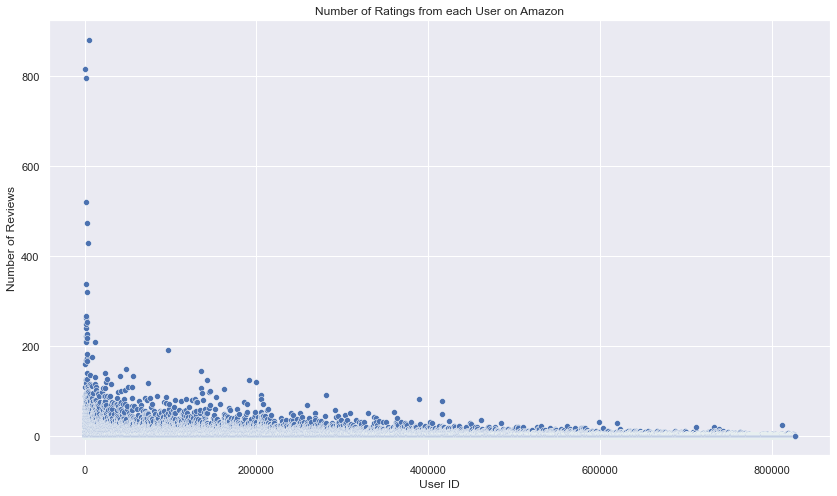

In [11]:
sns.set(rc={'figure.figsize':(14,8)})
sns.scatterplot(x='revID', y='count', data=rat_per_user)
plt.title('Number of Ratings from each User on Amazon')
plt.ylabel('Number of Reviews')
plt.xlabel('User ID')

From the scatterplot, one can see there are a very few outliers that have contributed more that 200 reviews.

Text(0.5, 0, 'User')

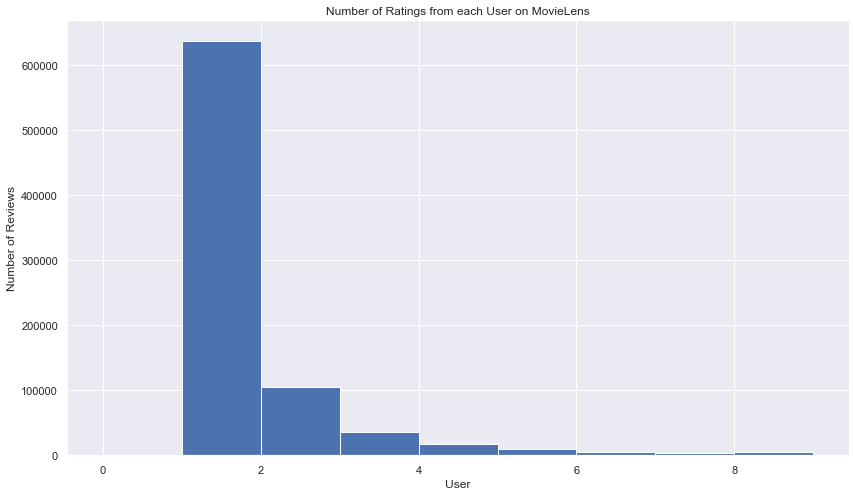

In [12]:
rat_per_user['count'].hist(bins=(np.arange(start=0, stop=10, step=1)))
plt.title('Number of Ratings from each User on MovieLens')
plt.ylabel('Number of Reviews')
plt.xlabel('User')

A histogram was provided as well to better see how most of the users are distributed. Here it can be seen that over 600000 users have only left 1 review.

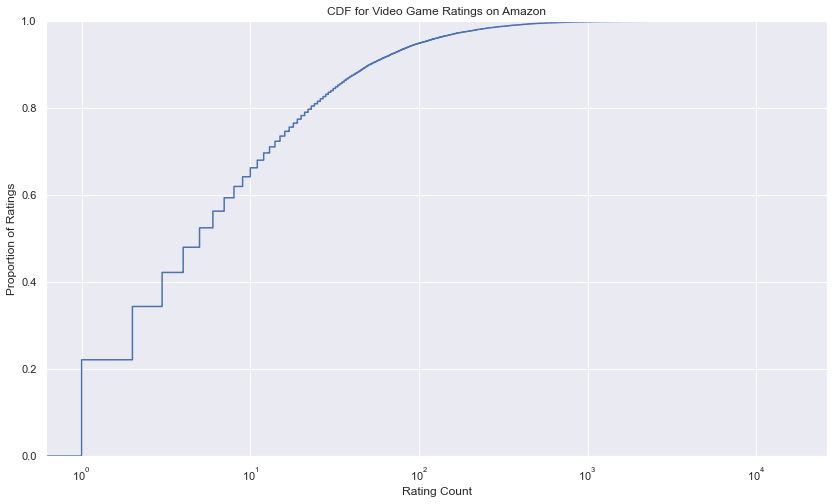

In [13]:
rat_per_item =  df.groupby(['itID'])['Ratings'].count().reset_index(name='count')
sns.ecdfplot(rat_per_item['count'], log_scale=True)
plt.title('CDF for Video Game Ratings on Amazon')
plt.ylabel('Proportion of Ratings')
plt.xlabel('Rating Count')
plt.show()

The CDF plot above shows how around 60% of the items have less than 10 different reviews, while some 5% have more than 100 reviews.

Text(0.5, 0, 'Average Video Game Ratings')

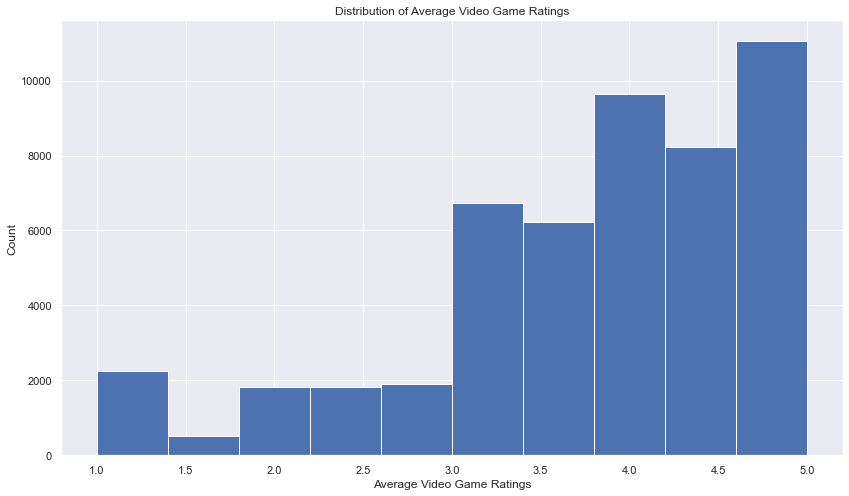

In [14]:
avg_rats = df.groupby(['itID'])['Ratings'].agg(['mean'])
avg_rats['mean'].hist()
plt.title('Distribution of Average Video Game Ratings')
plt.ylabel('Count')
plt.xlabel('Average Video Game Ratings')

The histogram distrobution shows that the average rating for each video game centers around 4 out of 5.

In [15]:
rat_per_item = df.groupby(['itID'])['Ratings'].count().reset_index(name='count')
rat_per_item.nlargest(10, 'count')

,itID,count
47005,47005,16221
45409,45409,7561
47906,47906,5713
43795,43795,5489
31038,31038,5190
38490,38490,4638
46509,46509,4510
23744,23744,4468
24153,24153,3522
17419,17419,3290


The 10 most popular items are listed above.

In [16]:
avg_rats = df.groupby(['itID'])['Ratings'].agg(['mean', 'count'])
avg_rats.nlargest(10, 'mean')

,mean,count
itID,,
3,5.0,1
5,5.0,1
9,5.0,2
12,5.0,1
17,5.0,2
20,5.0,1
33,5.0,1
35,5.0,2
38,5.0,1


The 10 items with the highest average ratings are shown by the above list, but as one can see most of these items have very few ratings making this list not very useful.

In [17]:
gmean = df['Ratings'].mean()
item_vals = df.groupby('itID')['Ratings'].agg(['sum', 'count', 'mean'])
item_vals['dmean'] = (item_vals['sum'] + (5 * gmean))/(item_vals['count'] + 5)
#item_vals = item_vals.join(movies, on='movieId')
item_vals.nlargest(10, 'dmean')

,sum,count,mean,dmean
itID,,,,
3344,563.0,114,4.938596,4.898267
38748,401.0,81,4.950617,4.894114
41794,254.0,51,4.980392,4.890960
47447,195.0,39,5.000000,4.883949
44416,316.0,64,4.937500,4.868026
41759,2211.0,454,4.870044,4.860335
47895,150.0,30,5.000000,4.854108
3301,349.0,71,4.915493,4.853865
45146,514.0,105,4.895238,4.853580


Using a damped average rating with a factor of 5, one can see completly different items that have are higher rated with more reviews. This list has a much better grasp on the best rated items.